In [ ]:
!pip install qiskit==0.31.0
%pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.5/236.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.0/207.0 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.circuit.library import CPhaseGate, CU3Gate
import numpy as np

**Theory Behind the Code**

Encode the two numbers in binary format using qubits 0-5.
Apply a X-gate to qubit 6 to set it to the |1> state.
Apply a controlled-NOT gate between qubit 5 and qubit 6.
Apply a controlled-NOT gate between qubit 4 and qubit 6.
Apply a controlled-NOT gate between qubit 3 and qubit 6.
Apply a X-gate to qubit 6 to revert it back to the |0> state.
Measure qubit 6.
If qubit 6 is in the |0> state, then the first number is greater than or equal to the second number. If qubit 6 is in the |1> state, then the second number is greater than the first number.

Encoded binary value of 6: 110
Encoded binary value of 7: 111
The largest number between 6 and 7 is 7


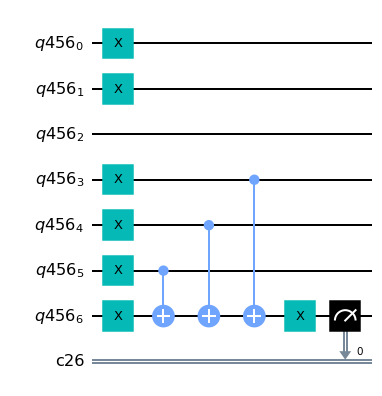

In [ ]:
#The code imports the required libraries and modules, such as the numerical operations library numpy, the quantum computing framework qiskit, 
#the simulator for quantum circuits Aer, and the data visualization tool matplotlib.

import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt

# Define the two numbers to be compared
number_1 = 6
number_2 = 7

# Create quantum and classical registers
qreg = QuantumRegister(7)
creg = ClassicalRegister(1)

# Create a quantum circuit and attach the registers to it
circuit = QuantumCircuit(qreg, creg)

# Encode the two numbers into the quantum registers
for i, number in enumerate([number_1, number_2]):
    binary_str = "{0:b}".format(abs(number)).zfill(3)
    for j, bit in enumerate(binary_str):
        if bit == '1':
            circuit.x(qreg[i*3+j])
    print(f"Encoded binary value of {number}: {''.join(['1' if b=='1' else '0' for b in binary_str])}")

# Compare the two numbers using CNOT gates
circuit.x(qreg[6])
for i in range(3):
    circuit.cx(qreg[5-i], qreg[6])
circuit.x(qreg[6])

# Measure the final state of the circuit and store the result in the classical register
circuit.measure(qreg[6], creg[0])

# Draw the circuit
circuit.draw(output='mpl')

# Execute the circuit on a simulator and get the result as a dictionary of counts
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1)
result = job.result().get_counts(circuit)

# Determine which number is larger based on the measurement result
if '1' in result:
    print(f"The largest number between {number_1} and {number_2} is {number_2}")
else:
    print(f"The largest number between {number_1} and {number_2} is {number_1}")

# Show the plot of the circuit
plt.show()

